<a href="https://colab.research.google.com/github/pradippatel00754/MLProjects/blob/main/Stock_Market_Prediction_using_ML_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout

In [42]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [44]:
data['Close'] = pd.to_numeric(data.Close, errors = 'coerce')
data= data.dropna()
trainData = data.iloc[:,4:5].values

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [46]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [47]:
from tensorflow.python import train
X_train = []
Y_train = []

for i in range(60,1149): #60: timestep // 1149 : Length of the data
    X_train.append(trainData[i-60:i,0])
    Y_train.append(trainData[i,0])

X_train, Y_train = np.array(X_train),np.array(Y_train)

In [48]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [49]:
model = Sequential()

model.add(LSTM(units=100, return_sequences= True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences= False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer='adam',loss='mean_squared_error')

In [50]:
hist = model.fit(X_train, Y_train, epochs=20,batch_size=32,verbose=2)

Epoch 1/20
35/35 - 45s - loss: 0.0346 - 45s/epoch - 1s/step
Epoch 2/20
35/35 - 7s - loss: 0.0121 - 7s/epoch - 214ms/step
Epoch 3/20
35/35 - 8s - loss: 0.0079 - 8s/epoch - 215ms/step
Epoch 4/20
35/35 - 8s - loss: 0.0074 - 8s/epoch - 215ms/step
Epoch 5/20
35/35 - 8s - loss: 0.0075 - 8s/epoch - 217ms/step
Epoch 6/20
35/35 - 8s - loss: 0.0070 - 8s/epoch - 215ms/step
Epoch 7/20
35/35 - 8s - loss: 0.0069 - 8s/epoch - 218ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0078 - 7s/epoch - 214ms/step
Epoch 9/20
35/35 - 8s - loss: 0.0079 - 8s/epoch - 216ms/step
Epoch 10/20
35/35 - 8s - loss: 0.0061 - 8s/epoch - 215ms/step
Epoch 11/20
35/35 - 8s - loss: 0.0095 - 8s/epoch - 217ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0062 - 7s/epoch - 212ms/step
Epoch 13/20
35/35 - 8s - loss: 0.0056 - 8s/epoch - 217ms/step
Epoch 14/20
35/35 - 8s - loss: 0.0050 - 8s/epoch - 216ms/step
Epoch 15/20
35/35 - 8s - loss: 0.0052 - 8s/epoch - 215ms/step
Epoch 16/20
35/35 - 8s - loss: 0.0051 - 8s/epoch - 219ms/step
Epoch 17/20
35/35 

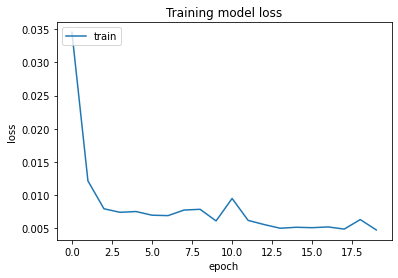

In [51]:
plt.plot(hist.history['loss'])
plt.title("Training model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [52]:
testData = pd.read_csv('Google_test_data.csv')
testData['Close'] = pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
Y_test = testData.iloc[60:,0:].values

#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
  X_test.append(inputClosing_scaled[i-timestep:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [54]:
Y_pred = model.predict(X_test)
Y_pred

6/6 [==============================] - 0s 73ms/step


array([[1.1578397],
       [1.159739 ],
       [1.170208 ],
       [1.1857094],
       [1.1970248],
       [1.1944364],
       [1.1797466],
       [1.1616936],
       [1.151491 ],
       [1.1502929],
       [1.145221 ],
       [1.1354771],
       [1.1268687],
       [1.1189585],
       [1.1181916],
       [1.123445 ],
       [1.1415026],
       [1.1684717],
       [1.1977158],
       [1.2252617],
       [1.2330189],
       [1.2258902],
       [1.2038664],
       [1.1756594],
       [1.1524585],
       [1.1416342],
       [1.142019 ],
       [1.1444339],
       [1.1389296],
       [1.1291394],
       [1.1181018],
       [1.1055735],
       [1.0866324],
       [1.0635319],
       [1.0559053],
       [1.0675873],
       [1.0901427],
       [1.1136596],
       [1.1341784],
       [1.1421689],
       [1.1508368],
       [1.1627606],
       [1.1775168],
       [1.1912277],
       [1.1998734],
       [1.1994728],
       [1.1889   ],
       [1.180591 ],
       [1.1795381],
       [1.186749 ],


In [56]:
predicted_price = sc.inverse_transform(Y_pred)

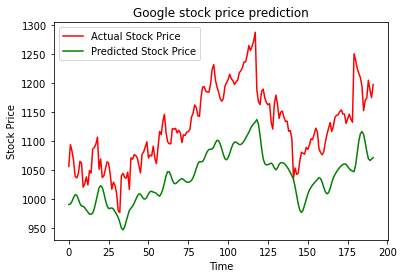

In [58]:
plt.plot(Y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()